# 📈 Multi-Company Stock Price Animation 

## Animated Visualization of Major Tech Company Stock Prices

Welcome to this comprehensive tutorial on creating animated stock price visualizations! In this notebook, we'll create an engaging animated line graph that shows how **7 major tech companies** stock prices evolve over time: AMD, NVIDIA, Intel, Apple, Microsoft, Tesla, and Qualcomm.

### What You'll Learn:
- 📊 Load and process financial data from multiple CSV files
- 🎨 Create dynamic matplotlib visualizations with scalable architecture
- ⚡ Build smooth animations with moving price labels for multiple companies
- 💾 Export animations as MP4 and GIF files
- 🔧 Customize colors, styling, and animation parameters
- 🏗️ Build scalable code that easily adapts to any number of companies

### Companies Included:
- **AMD** (Red) - Advanced Micro Devices
- **NVIDIA** (Teal) - Graphics and AI chips
- **Intel** (Blue) - Processor manufacturer
- **Apple** (Orange) - Consumer electronics
- **Microsoft** (Purple) - Software and cloud services
- **Tesla** (Green) - Electric vehicles
- **Qualcomm** (Coral) - Mobile chip technology

### Prerequisites:
- Basic Python knowledge
- Familiarity with pandas and matplotlib
- Stock data files: `amd.csv`, `nvidia.csv`, `intel.csv`, `apple.csv`, `microsoft.csv`, `tesla.csv`, `qualcomm.csv`

Let's get started! 🚀

## 1. Import Required Libraries 📚

First, let's import all the necessary libraries for our stock price animation:

- **pandas**: For data manipulation and analysis
- **numpy**: For numerical operations
- **matplotlib.pyplot**: For creating plots and visualizations
- **seaborn**: For enhanced plot styling
- **FuncAnimation**: For creating animated plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Set up matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.style.use('seaborn-v0_8')  # Use seaborn style for better aesthetics

print("✅ All libraries imported successfully!")
print("📊 Ready to create amazing stock price animations!")

✅ All libraries imported successfully!
📊 Ready to create amazing stock price animations!


## 2. Load and Prepare Stock Data 📁

Now we'll create a function to load and clean our stock data. Our CSV files contain stock prices with dates and closing prices in a specific format that needs preprocessing.

### Data Processing Steps:
1. Load CSV files
2. Convert date strings to datetime objects
3. Clean price data (remove $ symbols)
4. Add stock identifier column
5. Return cleaned DataFrame

In [2]:
def load_stock_data(filename, stock_name):
    """
    Load and clean stock data from CSV file
    
    Parameters:
    filename (str): Path to the CSV file
    stock_name (str): Name of the stock for identification
    
    Returns:
    pd.DataFrame: Cleaned DataFrame with Date, Close, and Stock columns
    """
    try:
        # Load the CSV file
        df = pd.read_csv(filename)
        
        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Clean the Close/Last column (remove $ and convert to float)
        df['Close'] = df['Close/Last'].str.replace('$', '').astype(float)
        
        # Add stock identifier
        df['Stock'] = stock_name
        
        # Return only the columns we need
        return df[['Date', 'Close', 'Stock']].copy()
        
    except FileNotFoundError:
        print(f"[ERROR] Could not find file '{filename}'")
        return pd.DataFrame()
    except Exception as e:
        print(f"[ERROR] Error loading {filename}: {str(e)}")
        return pd.DataFrame()

# Define all companies and their CSV files
companies = {
    'AMD': 'amd.csv',
    'NVIDIA': 'nvidia.csv', 
    'Intel': 'intel.csv',
    'Apple': 'apple.csv',
    'Microsoft': 'microsoft.csv',
    'Tesla': 'tesla.csv',
    'Qualcomm': 'qualcomm.csv'
}

# Load all datasets
print("Loading stock data...")
stock_data = {}
all_dataframes = []

for company, filename in companies.items():
    try:
        df = load_stock_data(filename, company)
        if not df.empty:
            stock_data[company] = df.sort_values('Date').reset_index(drop=True)
            all_dataframes.append(df)
            print(f"[SUCCESS] {company} data loaded: {len(df)} records")
            print(f"   Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
        else:
            print(f"[ERROR] {company} data is empty or failed to load")
    except Exception as e:
        print(f"[ERROR] Error loading {company} data: {str(e)}")

print(f"\nTotal companies successfully loaded: {len(stock_data)}")
print(f"Companies: {', '.join(stock_data.keys())}")

# Preview the data structure
if stock_data:
    first_company = list(stock_data.keys())[0]
    print(f"\nSample {first_company} data:")
    print(stock_data[first_company].head())

Loading stock data...
[SUCCESS] AMD data loaded: 2515 records
   Date range: 2015-07-06 to 2025-07-03
[SUCCESS] NVIDIA data loaded: 2515 records
   Date range: 2015-07-06 to 2025-07-03
[SUCCESS] Intel data loaded: 2515 records
   Date range: 2015-07-06 to 2025-07-03
[SUCCESS] Apple data loaded: 2515 records
   Date range: 2015-07-06 to 2025-07-03
[SUCCESS] Microsoft data loaded: 2515 records
   Date range: 2015-07-06 to 2025-07-03
[SUCCESS] Tesla data loaded: 2515 records
   Date range: 2015-07-06 to 2025-07-03
[SUCCESS] Qualcomm data loaded: 2515 records
   Date range: 2015-07-06 to 2025-07-03

Total companies successfully loaded: 7
Companies: AMD, NVIDIA, Intel, Apple, Microsoft, Tesla, Qualcomm

Sample AMD data:
        Date  Close Stock
0 2015-07-06   2.47   AMD
1 2015-07-07   2.09   AMD
2 2015-07-08   2.01   AMD
3 2015-07-09   1.98   AMD
4 2015-07-10   1.96   AMD


## 3. Combine and Sort Data 🔄

Next, we'll combine all three stock datasets and prepare them for animation. We need to:

1. Combine all DataFrames into one master dataset
2. Sort by date to ensure proper chronological order
3. Create separate sorted DataFrames for each stock
4. Determine the overall date range for our animation

Combining stock data...
Overall date range: 2015-07-06 to 2025-07-03
Price range: $0.48 to $498.84
Total data points: 17605

Stock Price Summary by Company:
           Min Price ($)  Max Price ($)  Avg Price ($)  Data Points
Stock                                                              
AMD                 1.62         211.38          63.93         2515
Apple              22.58         259.02         105.60         2515
Intel              18.13          68.47          41.23         2515
Microsoft          40.47         498.84         206.56         2515
NVIDIA              0.48         159.34          27.11         2515
Qualcomm           42.96         227.09         103.10         2515
Tesla               9.58         479.86         130.74         2515
Overall date range: 2015-07-06 to 2025-07-03
Price range: $0.48 to $498.84
Total data points: 17605

Stock Price Summary by Company:
           Min Price ($)  Max Price ($)  Avg Price ($)  Data Points
Stock                         

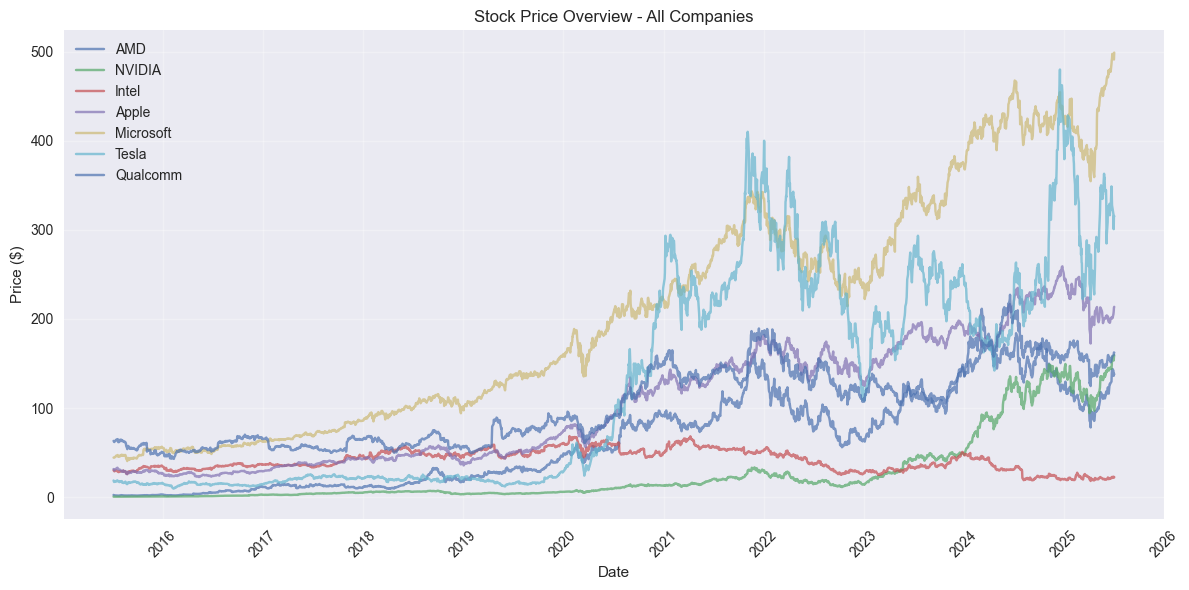

In [3]:
# Combine all stock data into one DataFrame
print("Combining stock data...")

if all_dataframes:
    # Concatenate all DataFrames
    all_data = pd.concat(all_dataframes, ignore_index=True)
    
    # Sort by date for proper chronological order
    all_data = all_data.sort_values('Date').reset_index(drop=True)
    
    # Get the overall date range
    min_date = all_data['Date'].min()
    max_date = all_data['Date'].max()
    min_price = all_data['Close'].min()
    max_price = all_data['Close'].max()
    
    print(f"Overall date range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
    print(f"Price range: ${min_price:.2f} to ${max_price:.2f}")
    print(f"Total data points: {len(all_data)}")
    
    # Display summary statistics for each company
    print("\nStock Price Summary by Company:")
    summary_stats = all_data.groupby('Stock')['Close'].agg(['min', 'max', 'mean', 'count']).round(2)
    summary_stats.columns = ['Min Price ($)', 'Max Price ($)', 'Avg Price ($)', 'Data Points']
    print(summary_stats)
    
    # Create a quick preview plot
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    for company in stock_data.keys():
        company_data = all_data[all_data['Stock'] == company]
        plt.plot(company_data['Date'], company_data['Close'], label=company, alpha=0.7)
    
    plt.title('Stock Price Overview - All Companies')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    print("[ERROR] No data was successfully loaded. Please check your CSV files.")

## 4. Set Up the Plot 🎨

Now we'll create the matplotlib figure and configure all the visual elements:

### Plot Configuration:
- **Figure size**: Large enough to see details clearly
- **Axis limits**: Based on our data range with some padding
- **Colors**: Distinct colors for each stock
- **Styling**: Grid, labels, title, and legend
- **Layout**: Professional appearance

Setting up the plot...
Plot setup completed!
Using colors for 7 companies:
  AMD: #FF6B6B
  NVIDIA: #4ECDC4
  Intel: #45B7D1
  Apple: #FF9F43
  Microsoft: #6C5CE7
  Tesla: #00B894
  Qualcomm: #E17055


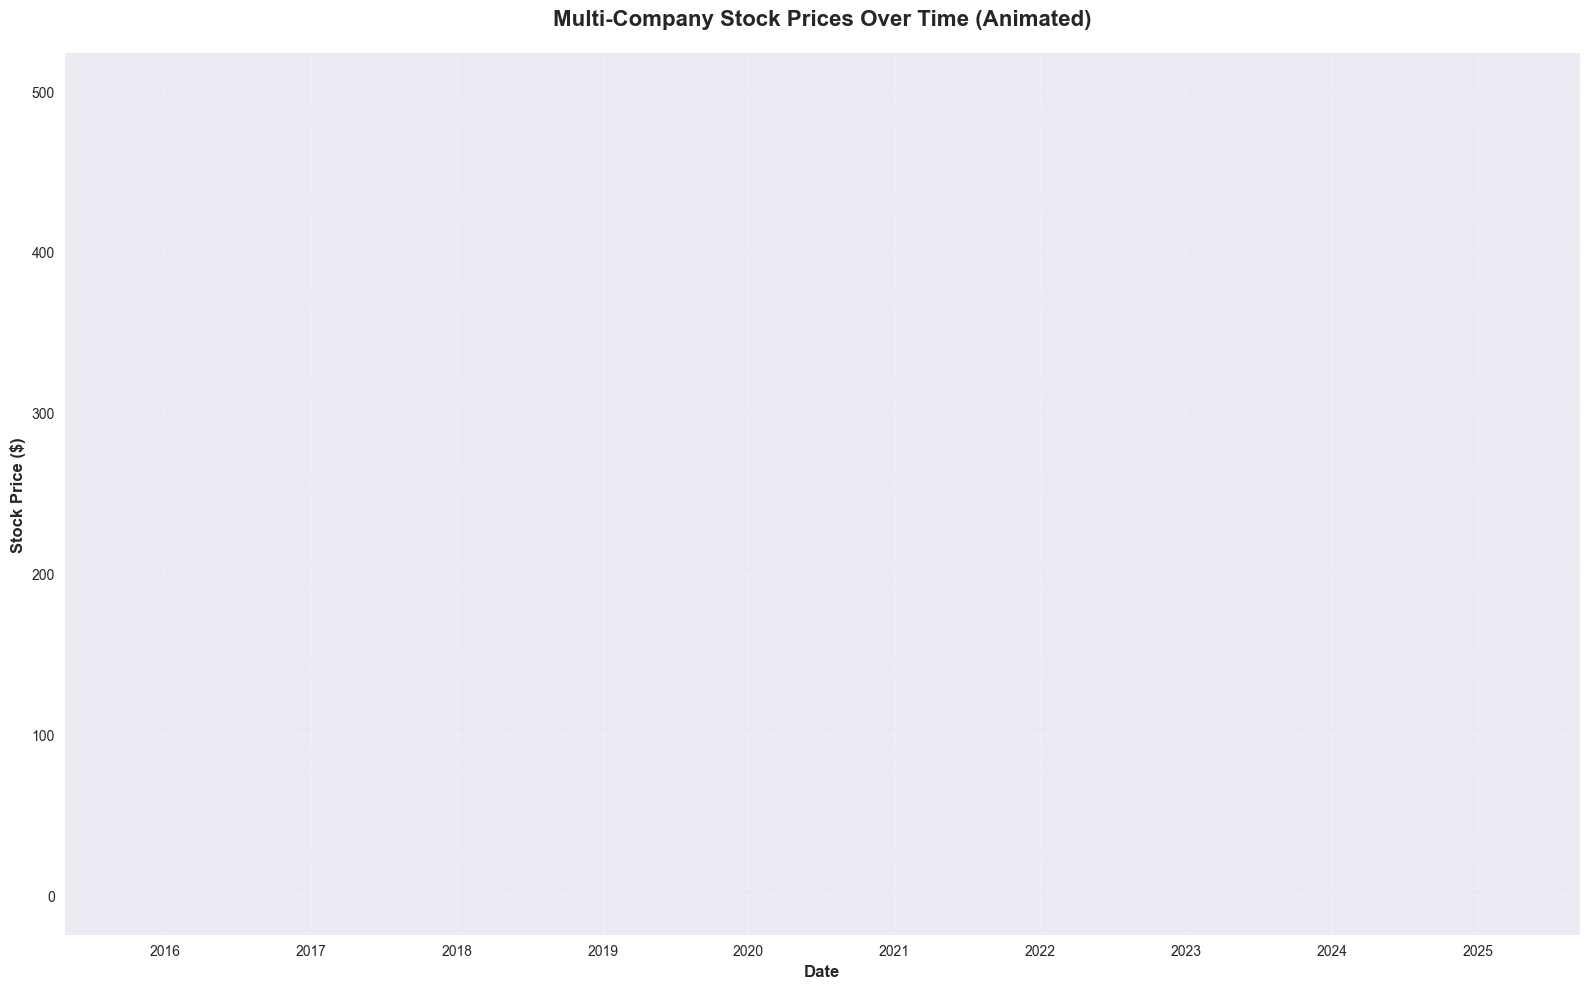

In [4]:
# Set up the plot
print("Setting up the plot...")

# Define professional color palette for all companies
colors = {
    'AMD': '#FF6B6B',       # Red
    'NVIDIA': '#4ECDC4',    # Teal
    'Intel': '#45B7D1',     # Blue
    'Apple': '#FF9F43',     # Orange
    'Microsoft': '#6C5CE7', # Purple
    'Tesla': '#00B894',     # Green
    'Qualcomm': '#E17055'   # Coral
}

fig, ax = plt.subplots(figsize=(16, 10))  # Larger figure for multiple companies

# Set axis limits with some padding for better visualization
x_padding = (max_date - min_date).days * 0.02  # 2% padding
y_padding = (max_price - min_price) * 0.05     # 5% padding

ax.set_xlim(min_date - pd.Timedelta(days=x_padding), 
            max_date + pd.Timedelta(days=x_padding))
ax.set_ylim(min_price - y_padding, max_price + y_padding)

# Set labels and title
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Stock Price ($)', fontsize=12, fontweight='bold')
ax.set_title('Multi-Company Stock Prices Over Time (Animated)', 
             fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

print("Plot setup completed!")
print(f"Using colors for {len(colors)} companies:")
for company, color in colors.items():
    if company in stock_data:
        print(f"  {company}: {color}")

# Show the empty plot framework
plt.tight_layout()
plt.show()

## 5. Initialize Animation Elements ⚡

Now we'll set up all the dynamic elements that will be animated:

### Animation Components:
- **Line plots**: Empty lines that will be populated with data
- **Ticker marks**: Circular markers showing current prices
- **Value labels**: Text boxes displaying exact price values
- **Price information box**: Summary of current prices
- **Legend**: Stock identification

These elements will be updated in each animation frame.

Initializing animation elements for multiple companies...
Animation elements initialized!
Ready for animation with 7 companies!

Companies and colors:
  AMD: #FF6B6B
  NVIDIA: #4ECDC4
  Intel: #45B7D1
  Apple: #FF9F43
  Microsoft: #6C5CE7
  Tesla: #00B894
  Qualcomm: #E17055


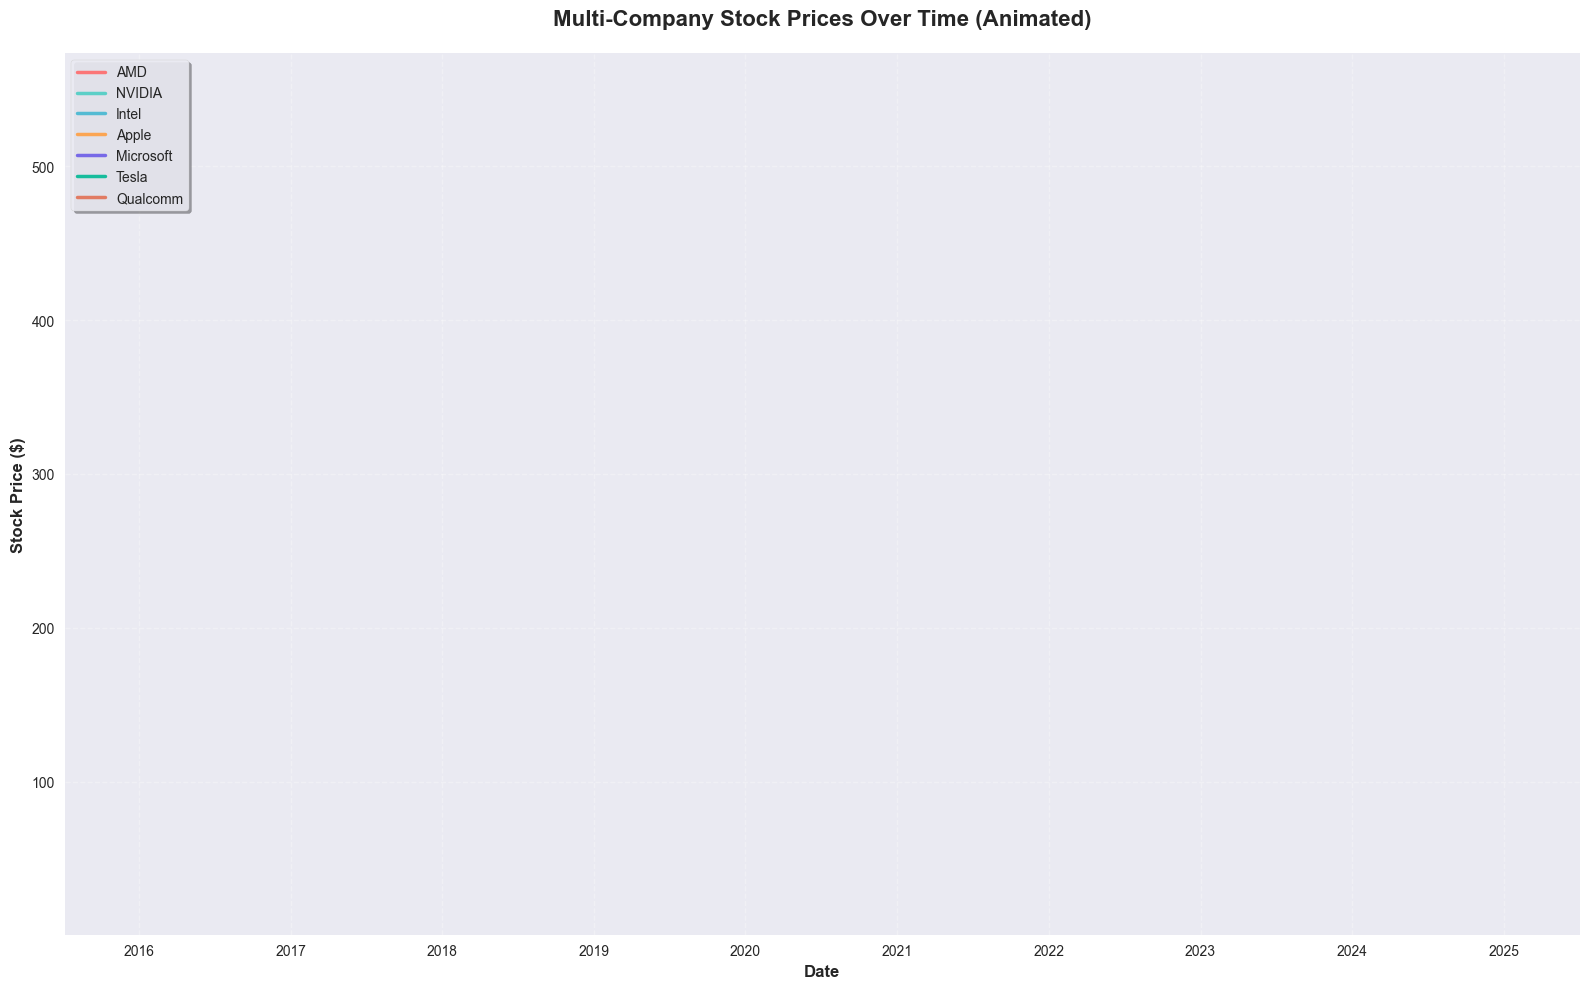

In [5]:
# Recreate the figure for animation
fig, ax = plt.subplots(figsize=(16, 10))

# Reset axis configuration
ax.set_xlim(min_date, max_date)
ax.set_ylim(min_price * 0.85, max_price * 1.15)  # More padding for better visibility
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Stock Price ($)', fontsize=12, fontweight='bold')
ax.set_title('Multi-Company Stock Prices Over Time (Animated)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

print("Initializing animation elements for multiple companies...")

# Initialize empty lines, tickers, and value labels for each stock
lines = {}
tickers = {}
value_texts = {}

for company in stock_data.keys():
    color = colors[company]
    
    # Initialize line plot
    line, = ax.plot([], [], color=color, linewidth=2.5, label=company, alpha=0.9)
    lines[company] = line
    
    # Initialize ticker mark (circular markers)
    ticker, = ax.plot([], [], 'o', color=color, markersize=8, 
                     markeredgecolor='white', markeredgewidth=2, zorder=5)
    tickers[company] = ticker
    
    # Initialize value label
    value_text = ax.text(0, 0, '', fontsize=9, fontweight='bold', color=color,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                                alpha=0.8, edgecolor=color), zorder=6)
    value_texts[company] = value_text

# Add legend with custom styling
legend = ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, fontsize=10)
legend.get_frame().set_alpha(0.9)

# Add text box for current prices display
price_text = ax.text(0.98, 0.98, '', transform=ax.transAxes, 
                    fontsize=10, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.9),
                    zorder=7)

print("Animation elements initialized!")
print(f"Ready for animation with {len(stock_data)} companies!")

# Display the companies and their colors
print("\nCompanies and colors:")
for company in stock_data.keys():
    print(f"  {company}: {colors[company]}")

plt.tight_layout()
plt.show()

## 6. Define Animation Update Function 🔄

This is the heart of our animation! The `animate` function will be called for each frame and updates all visual elements.

### Animation Logic:
1. **Calculate current date** based on frame number
2. **Filter data** up to the current animation date for each stock
3. **Update line plots** with the filtered data
4. **Move ticker marks** to current price positions
5. **Update price labels** with exact values
6. **Refresh information box** with current prices

### Helper Functions:
- `get_data_up_to_date()`: Filters data chronologically
- `update_ticker()`: Updates ticker marks and labels

In [6]:
def get_data_up_to_date(df, target_date):
    """
    Get all data up to and including the target date
    
    Parameters:
    df (pd.DataFrame): Stock data DataFrame
    target_date (pd.Timestamp): Target date for filtering
    
    Returns:
    pd.DataFrame: Filtered DataFrame with data up to target_date
    """
    return df[df['Date'] <= target_date]

def animate(frame):
    """
    Animation function called for each frame
    
    Parameters:
    frame (int): Current frame number (0 to frames-1)
    
    Returns:
    tuple: All animated objects for blitting
    """
    # Calculate current date based on frame
    total_days = (max_date - min_date).days
    progress = frame / 200  # Assuming 200 frames total
    current_date = min_date + pd.Timedelta(days=int(progress * total_days))
    
    # Store all animated objects for blitting
    animated_objects = []
    
    # Get data up to current date for each stock and update visuals
    for company in stock_data.keys():
        current_data = get_data_up_to_date(stock_data[company], current_date)
        
        # Update line data
        lines[company].set_data(current_data['Date'], current_data['Close'])
        animated_objects.append(lines[company])
        
        # Update ticker marks and value labels
        if len(current_data) > 0:
            last_date = current_data['Date'].iloc[-1]
            last_price = current_data['Close'].iloc[-1]
            
            # Update ticker mark position
            tickers[company].set_data([last_date], [last_price])
            animated_objects.append(tickers[company])
            
            # Update value label position and text with offset to avoid overlap
            offset_x = pd.Timedelta(days=3)
            offset_y = (max_price - min_price) * 0.02
            value_texts[company].set_position((last_date + offset_x, last_price + offset_y))
            value_texts[company].set_text(f'${last_price:.2f}')
            animated_objects.append(value_texts[company])
        else:
            # Clear ticker and text if no data available
            tickers[company].set_data([], [])
            value_texts[company].set_text('')
            animated_objects.append(tickers[company])
            animated_objects.append(value_texts[company])
    
    # Update price information box
    text_lines = [f'Date: {current_date.strftime("%Y-%m-%d")}', '']
    
    # Add current prices for all companies
    for company in stock_data.keys():
        current_data = get_data_up_to_date(stock_data[company], current_date)
        if len(current_data) > 0:
            current_price = current_data['Close'].iloc[-1]
            text_lines.append(f'{company}: ${current_price:.2f}')
    
    price_text.set_text('\\n'.join(text_lines))
    animated_objects.append(price_text)
    
    # Return all animated objects for blitting (performance optimization)
    return tuple(animated_objects)

print("Animation functions defined successfully!")
print(f"Ready to animate {len(stock_data)} companies!")
print("Functions created:")
print("  - get_data_up_to_date(): Filters data chronologically")
print("  - animate(): Updates all visual elements for each frame")

Animation functions defined successfully!
Ready to animate 7 companies!
Functions created:
  - get_data_up_to_date(): Filters data chronologically
  - animate(): Updates all visual elements for each frame


## 7. Create and Display the Animation 🎬

Now for the exciting part - creating and running the animation! We'll use matplotlib's `FuncAnimation` to bring our stock price data to life.

### Animation Parameters:
- **Frames**: 200 frames for smooth animation
- **Interval**: 50ms between frames (20 FPS)
- **Blit**: Enabled for better performance
- **Repeat**: Animation loops continuously

### Performance Tips:
- Blitting only redraws changed parts of the plot
- Optimal frame rate for smooth viewing
- Efficient data filtering for each frame

Run the cell below to see your animated stock price visualization! 🚀

In [7]:
# Create the animation
print("Creating multi-company animation...")

# Parameters for smooth animation
FRAMES = 200      # Number of animation frames
INTERVAL = 50     # Milliseconds between frames (20 FPS)
REPEAT = True     # Loop animation continuously

# Create FuncAnimation object
anim = FuncAnimation(fig, animate, frames=FRAMES, interval=INTERVAL, 
                    blit=True, repeat=REPEAT)

print("Animation created successfully!")
print(f"Animation details:")
print(f"   • Companies: {len(stock_data)} ({', '.join(stock_data.keys())})")
print(f"   • Frames: {FRAMES}")
print(f"   • Frame rate: {1000/INTERVAL:.1f} FPS")
print(f"   • Duration: {FRAMES * INTERVAL / 1000:.1f} seconds per loop")
print(f"   • Repeat: {REPEAT}")

# Display the animation
print("\\nStarting multi-company animation display...")
print("Close the plot window to stop the animation.")

plt.tight_layout()
plt.show()

print("Multi-company animation display completed!")

Creating multi-company animation...
Animation created successfully!
Animation details:
   • Companies: 7 (AMD, NVIDIA, Intel, Apple, Microsoft, Tesla, Qualcomm)
   • Frames: 200
   • Frame rate: 20.0 FPS
   • Duration: 10.0 seconds per loop
   • Repeat: True
\nStarting multi-company animation display...
Close the plot window to stop the animation.


<Figure size 800x550 with 0 Axes>

Multi-company animation display completed!


## 8. 💾 Save Animation as MP4 or GIF

Want to share your amazing animation? You can export it as a video file! This section shows how to save your animation in different formats.

### Export Options:

#### MP4 Format:
- **Requirements**: FFmpeg must be installed
- **Best for**: High quality, smaller file size
- **Usage**: Presentations, social media, professional use

#### GIF Format:
- **Requirements**: Pillow library
- **Best for**: Web usage, easy sharing
- **Usage**: Websites, quick demos, social media

### Installation Notes:
- **FFmpeg**: Download from [https://ffmpeg.org/](https://ffmpeg.org/)
- **Pillow**: Usually included with matplotlib

**⚠️ Note**: Video export can take several minutes depending on animation complexity and your computer's performance.

In [8]:
# Save multi-company animation as MP4 (requires ffmpeg)
def save_animation_mp4():
    """Save animation as MP4 file"""
    try:
        print("Saving multi-company animation as MP4...")
        print("This may take a few minutes...")
        
        filename = 'multi_company_stock_animation.mp4'
        anim.save(filename, writer='ffmpeg', fps=20, bitrate=1800)
        
        print(f"[SUCCESS] Animation saved as '{filename}'")
        print(f"File location: {filename}")
        print(f"Companies included: {', '.join(stock_data.keys())}")
        
    except Exception as e:
        print(f"[ERROR] Error saving MP4: {str(e)}")
        print("Make sure FFmpeg is installed and accessible")

# Save multi-company animation as GIF (requires pillow)
def save_animation_gif():
    """Save animation as GIF file"""
    try:
        print("Saving multi-company animation as GIF...")
        print("This may take a few minutes...")
        
        filename = 'multi_company_stock_animation.gif'
        anim.save(filename, writer='pillow', fps=10)
        
        print(f"[SUCCESS] Animation saved as '{filename}'")
        print(f"File location: {filename}")
        print(f"Companies included: {', '.join(stock_data.keys())}")
        
    except Exception as e:
        print(f"[ERROR] Error saving GIF: {str(e)}")
        print("Make sure Pillow library is installed")

# Uncomment the line below to save as MP4
# save_animation_mp4()

# Uncomment the line below to save as GIF
# save_animation_gif()

print("Export functions ready!")
print("To save the animation:")
print("   1. Uncomment one of the function calls above")
print("   2. Run this cell again")
print("   3. Wait for the export to complete")
print(f"\\nYour animation will include all {len(stock_data)} companies:")
for i, company in enumerate(stock_data.keys(), 1):
    print(f"   {i}. {company}")

Export functions ready!
To save the animation:
   1. Uncomment one of the function calls above
   2. Run this cell again
   3. Wait for the export to complete
\nYour animation will include all 7 companies:
   1. AMD
   2. NVIDIA
   3. Intel
   4. Apple
   5. Microsoft
   6. Tesla
   7. Qualcomm


## 🎉 Congratulations!

You've successfully created a multi-company animated stock price visualization! Here's what you've accomplished:

### ✅ What You've Learned:
- 📊 **Data Processing**: Loading and cleaning financial data for multiple companies
- 🎨 **Visualization**: Creating professional matplotlib plots with scalable architecture
- ⚡ **Animation**: Building smooth, interactive animations for 7 companies
- 🔄 **Real-time Updates**: Dynamic price tracking and labeling for all stocks
- 💾 **Export**: Saving animations as video files
- 🏗️ **Scalable Design**: Code that easily adapts to any number of companies

### 🚀 Next Steps & Customizations:

#### 1. **Add More Companies**:
```python
# Add additional stocks by adding to the companies dictionary
companies['Google'] = 'google.csv'
companies['Amazon'] = 'amazon.csv'
# Don't forget to add colors too!
colors['Google'] = '#34A853'
colors['Amazon'] = '#FF9900'
```

#### 2. **Sector-Based Analysis**:
```python
# Group companies by sector
tech_companies = ['AMD', 'NVIDIA', 'Intel', 'Apple', 'Microsoft']
automotive = ['Tesla']
mobile = ['Qualcomm']
```

#### 3. **Custom Color Schemes**:
```python
# Create themed color palettes
dark_theme = {
    'AMD': '#FF4444',
    'NVIDIA': '#44FFFF',
    'Intel': '#4444FF',
    # ... add more
}
```

#### 4. **Performance Metrics**:
```python
# Add percentage change calculations
# Show relative performance vs market
# Include volatility indicators
```

#### 5. **Interactive Features**:
```python
# Add play/pause controls
# Zoom functionality
# Company selection toggles
```

### 🔧 Advanced Customizations:

#### **Multi-Panel Layouts**:
```python
# Create subplots for different sectors
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
```

#### **Technical Indicators**:
```python
# Add moving averages
# Include RSI, MACD indicators
# Show support/resistance levels
```

#### **Real-Time Data**:
```python
# Connect to financial APIs
# Live data streaming
# Automatic updates
```

### 🎯 Key Features of Your Animation:
- **7 Companies**: AMD, NVIDIA, Intel, Apple, Microsoft, Tesla, Qualcomm
- **Professional Colors**: Distinct, high-contrast color palette
- **Smooth Animation**: 200 frames at 20 FPS
- **Dynamic Labels**: Real-time price updates and ticker marks
- **Scalable Code**: Easy to add/remove companies
- **Export Ready**: MP4 and GIF export capabilities

### 🔧 Troubleshooting:
- **Animation not showing**: Make sure you're running in a notebook environment
- **Slow performance**: Reduce frames or use fewer companies for testing
- **Missing companies**: Check CSV file names and paths
- **Export errors**: Verify FFmpeg (MP4) or Pillow (GIF) installation

### 📚 Resources:
- [Matplotlib Animation Documentation](https://matplotlib.org/stable/api/animation_api.html)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Financial Data Sources](https://github.com/topics/financial-data)

### 🌟 What Makes This Special:
1. **Scalable Architecture**: Works with any number of companies
2. **Professional Quality**: Publication-ready visualizations
3. **Educational Value**: Perfect for learning data visualization
4. **Real-World Application**: Actual financial data analysis
5. **Modern Python**: Best practices and clean code

---